Exploratory Data Analysis (EDA)+ ML model developnment on Sylhet

import all the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sbs

In [ ]:
Sylhet=pd.read_csv("/content/drive/MyDrive/Sylhet.csv")
Sylhet.info() #3895 entries, 45 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        3881 non-null   object 
 1   datetime                    3881 non-null   object 
 2   tempmax                     3881 non-null   float64
 3   tempmin                     3881 non-null   float64
 4   temp                        3881 non-null   float64
 5   feelslikemax                3881 non-null   float64
 6   feelslikemin                3881 non-null   float64
 7   feelslike                   3881 non-null   float64
 8   dew                         3881 non-null   float64
 9   humidity                    3881 non-null   float64
 10  precip                      3881 non-null   float64
 11  precipprob                  3881 non-null   int64  
 12  precipcover                 3881 non-null   float64
 13  preciptype                  2410 

Removing columns with no meaning and also having data mssing more than 70%

In [ ]:
Sylhet.drop(['name', 'Unnamed: 0', 'stations', 'severerisk', 'snow', 'snowdepth', 'windgust', 'sunrise', 'sunset'], axis=1,inplace=True)
Sylhet.info() #45 to 36 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   datetime                    3881 non-null   object 
 1   tempmax                     3881 non-null   float64
 2   tempmin                     3881 non-null   float64
 3   temp                        3881 non-null   float64
 4   feelslikemax                3881 non-null   float64
 5   feelslikemin                3881 non-null   float64
 6   feelslike                   3881 non-null   float64
 7   dew                         3881 non-null   float64
 8   humidity                    3881 non-null   float64
 9   precip                      3881 non-null   float64
 10  precipprob                  3881 non-null   int64  
 11  precipcover                 3881 non-null   float64
 12  preciptype                  2410 non-null   object 
 13  windspeed                   3881 

Change the data type of datetime column

In [ ]:
Sylhet['datetime'] = pd.to_datetime(Sylhet['datetime'])
Sylhet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   datetime                    3881 non-null   datetime64[ns]
 1   tempmax                     3881 non-null   float64       
 2   tempmin                     3881 non-null   float64       
 3   temp                        3881 non-null   float64       
 4   feelslikemax                3881 non-null   float64       
 5   feelslikemin                3881 non-null   float64       
 6   feelslike                   3881 non-null   float64       
 7   dew                         3881 non-null   float64       
 8   humidity                    3881 non-null   float64       
 9   precip                      3881 non-null   float64       
 10  precipprob                  3881 non-null   int64         
 11  precipcover                 3881 non-null   float64     

To check correlations

In [ ]:
!pip install dython

In [ ]:
# Compute the correlation matrix using Pandas
correlation_matrix = Sylhet.corr()

# Extract upper triangular part and keep only values > 0.85
upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
upper_triangular_high_correlations = upper_triangular[upper_triangular > 0.85]

# Create a mask to identify unique pairs
mask = ~upper_triangular_high_correlations.duplicated(keep="first")

# Display only unique pairs with correlations greater than 0.85
pd.set_option("display.max_rows", None)
print(upper_triangular_high_correlations[mask].stack())
pd.reset_option("display.max_rows")  # Reset the display setting

tempmax              temp                         0.878457
                     temperature_2m_max           0.872056
tempmin              temp                         0.928728
                     feelslikemax                 0.876153
                     feelslikemin                 0.997588
                     feelslike                    0.933238
                     dew                          0.892793
                     temperature_2m_min           0.902213
                     temperature_2m_mean          0.877428
                     apparent_temperature_mean    0.894180
temp                 feelslikemax                 0.943137
                     feelslikemin                 0.927809
                     feelslike                    0.970574
                     temperature_2m_min           0.920697
                     temperature_2m_mean          0.954970
                     apparent_temperature_mean    0.945757
feelslikemax         feelslikemin                 0.8752

<ipython-input-51-067b23bc2654>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
#remove high correlations columns
#precip sum and rain sum is same, if we keep both, then rain_sum will be entirely responsible for predicting preciptation sum
columns_to_drop = ['temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'solarenergy', 'uvindex', 'precipitation_sum', 'temperature_2m_max',
                   'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_mean']

# Drop the specified columns
Sylhet_1 = Sylhet.drop(columns=columns_to_drop, axis =1)
Sylhet_1.info() #25 columns remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   datetime                    3881 non-null   datetime64[ns]
 1   tempmax                     3881 non-null   float64       
 2   tempmin                     3881 non-null   float64       
 3   dew                         3881 non-null   float64       
 4   humidity                    3881 non-null   float64       
 5   precip                      3881 non-null   float64       
 6   precipprob                  3881 non-null   int64         
 7   precipcover                 3881 non-null   float64       
 8   preciptype                  2410 non-null   object        
 9   windspeed                   3881 non-null   float64       
 10  winddir                     3881 non-null   float64       
 11  sealevelpressure            3858 non-null   float64     

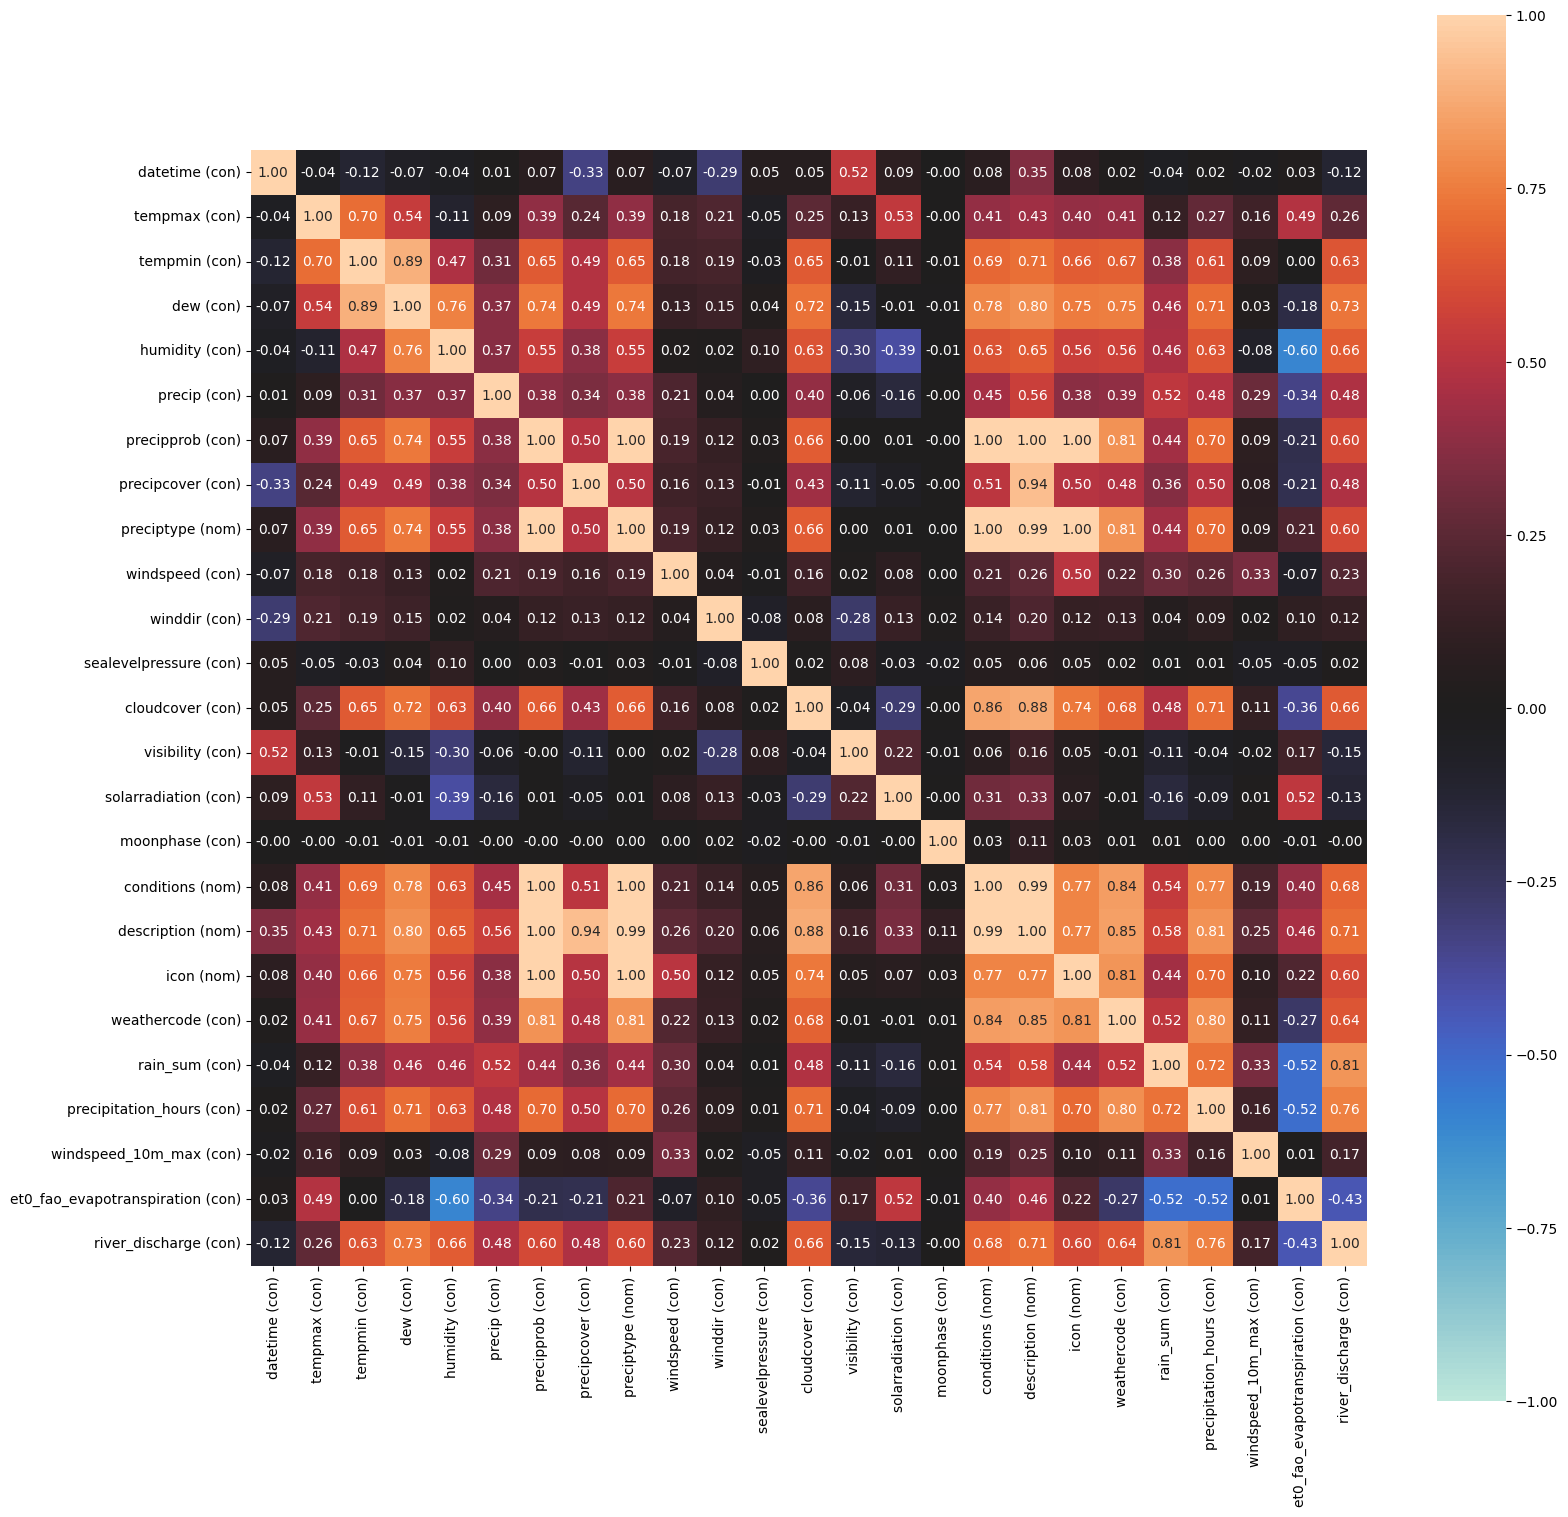

In [ ]:
from dython import nominal
corr_matrix = nominal.associations(Sylhet_1, figsize=(18, 18), mark_columns=True)

In [ ]:
#remove high correlations columns
columns_to_drop = ['preciptype', 'conditions', 'description', 'icon']

# Drop the specified columns
Sylhet_2 = Sylhet_1.drop(columns=columns_to_drop, axis =1)
Sylhet_2.info() #21 columns remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   datetime                    3881 non-null   datetime64[ns]
 1   tempmax                     3881 non-null   float64       
 2   tempmin                     3881 non-null   float64       
 3   dew                         3881 non-null   float64       
 4   humidity                    3881 non-null   float64       
 5   precip                      3881 non-null   float64       
 6   precipprob                  3881 non-null   int64         
 7   precipcover                 3881 non-null   float64       
 8   windspeed                   3881 non-null   float64       
 9   winddir                     3881 non-null   float64       
 10  sealevelpressure            3858 non-null   float64       
 11  cloudcover                  3881 non-null   float64     

Handle missing values

In [ ]:
Sylhet_2.isnull().sum()

datetime                       0
tempmax                        0
tempmin                        0
dew                            0
humidity                       0
precip                         0
precipprob                     0
precipcover                    0
windspeed                      0
winddir                        0
sealevelpressure              23
cloudcover                     0
visibility                    18
solarradiation                 0
moonphase                      0
weathercode                    0
rain_sum                       0
precipitation_hours            0
windspeed_10m_max              0
et0_fao_evapotranspiration     0
river_discharge                0
dtype: int64

In [ ]:
# Impute with Monthly Mean for 'sealevelpressure'
Sylhet_2['sealevelpressure'] = Sylhet_2.groupby(Sylhet_2['datetime'].dt.month)['sealevelpressure'].transform(lambda x: x.fillna(x.mean()))

# Impute with Monthly Mean for 'visibility'
Sylhet_2['visibility'] = Sylhet_2.groupby(Sylhet_2['datetime'].dt.month)['visibility'].transform(lambda x: x.fillna(x.mean()))
Sylhet_2.isnull().sum()

datetime                      0
tempmax                       0
tempmin                       0
dew                           0
humidity                      0
precip                        0
precipprob                    0
precipcover                   0
windspeed                     0
winddir                       0
sealevelpressure              0
cloudcover                    0
visibility                    0
solarradiation                0
moonphase                     0
weathercode                   0
rain_sum                      0
precipitation_hours           0
windspeed_10m_max             0
et0_fao_evapotranspiration    0
river_discharge               0
dtype: int64

Boxplot for outliers

Time series plot

In [ ]:
fig = px.line(Sylhet_2, x='datetime', y='rain_sum', title='Time Series Plot for rain')
fig.update_xaxes(title_text='Datetime')
fig.update_yaxes(title_text='rain_sum')

fig.show()

In [ ]:
fig = px.line(Sylhet_2, x='datetime', y='river_discharge', title='Time Series Plot for river discharge')
fig.update_xaxes(title_text='Datetime')
fig.update_yaxes(title_text='river_discharge')

fig.show()

In [ ]:
fig = px.line(Sylhet_2, x='datetime', y='precip', title='Time Series Plot for river precipitation')
fig.update_xaxes(title_text='Datetime')
fig.update_yaxes(title_text='precipitation')

fig.show()

In [ ]:
Sylhet_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax,3881.0,30.476011,3.575949,18.90,28.20,31.10,32.90,41.70
tempmin,3881.0,18.863051,5.580282,3.40,14.50,19.70,23.90,28.00
dew,3881.0,19.999536,5.771834,2.60,15.20,21.60,25.30,27.80
humidity,3881.0,78.166993,12.196294,32.90,72.00,81.30,87.40,97.60
precip,3881.0,7.364468,15.275627,0.00,0.00,0.80,8.90,200.00
precipprob,3881.0,62.097398,48.520713,0.00,0.00,100.00,100.00,100.00
precipcover,3881.0,18.884027,29.588074,0.00,0.00,4.17,20.83,100.00
windspeed,3881.0,12.937825,7.067829,5.40,9.40,11.20,14.50,91.60
winddir,3881.0,166.490827,66.116475,0.70,115.60,179.30,207.20,359.90
sealevelpressure,3881.0,1008.798925,5.233319,991.90,1004.70,1009.00,1013.10,1020.60


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Identify and store the datetime column, if any
datetime_column = Sylhet_2.select_dtypes(include=['datetime64']).columns.tolist()

# Exclude the datetime column from scaling
numeric_columns = Sylhet_2.select_dtypes(include=['float64', 'int64']).columns.difference(datetime_column)
Sylhet_scaled = Sylhet_2.copy()
Sylhet_scaled[numeric_columns] = scaler.fit_transform(Sylhet_2[numeric_columns])

In [ ]:
Sylhet_scaled.head(30)

,datetime,tempmax,tempmin,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,...,cloudcover,visibility,solarradiation,moonphase,weathercode,rain_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge
0,2013-01-01,0.192982,0.211382,0.313492,0.607419,0.0,0.0,0.0,0.049884,0.577673,...,0.000,0.090909,0.501353,0.642857,0.046154,0.0,0.0,0.122881,0.295638,0.012924
1,2013-01-02,0.236842,0.288618,0.361111,0.607419,0.0,0.0,0.0,0.070766,0.565423,...,0.000,0.116162,0.515780,0.683673,0.030769,0.0,0.0,0.101695,0.316640,0.012924
2,2013-01-03,0.162281,0.313008,0.416667,0.712519,0.0,0.0,0.0,0.091647,0.618597,...,0.098,0.166667,0.376916,0.714286,0.030769,0.0,0.0,0.101695,0.324717,0.012520
3,2013-01-04,0.258772,0.406504,0.444444,0.689335,0.0,0.0,0.0,0.037123,0.894766,...,0.148,0.166667,0.469191,0.755102,0.015385,0.0,0.0,0.156780,0.300485,0.011712
4,2013-01-05,0.214912,0.341463,0.357143,0.595054,0.0,0.0,0.0,0.033643,0.694878,...,0.010,0.141414,0.477307,0.765306,0.015385,0.0,0.0,0.139831,0.371567,0.010905
5,2013-01-06,0.201754,0.191057,0.313492,0.616692,0.0,0.0,0.0,0.046404,0.652561,...,0.000,0.141414,0.469191,0.826531,0.015385,0.0,0.0,0.046610,0.374798,0.010905
6,2013-01-07,0.149123,0.215447,0.277778,0.615147,0.0,0.0,0.0,0.067285,0.695434,...,0.127,0.131313,0.458371,0.857143,0.046154,0.0,0.0,0.161017,0.327948,0.010501
7,2013-01-08,0.026316,0.142276,0.111111,0.449768,0.0,0.0,0.0,0.067285,0.747773,...,0.114,0.116162,0.522092,0.897959,0.000000,0.0,0.0,0.161017,0.360258,0.009693
8,2013-01-09,0.035088,0.048780,0.103175,0.571870,0.0,0.0,0.0,0.067285,0.654510,...,0.029,0.055556,0.567178,0.928571,0.015385,0.0,0.0,0.097458,0.352181,0.009693
9,2013-01-10,0.013158,0.044715,0.119048,0.581144,0.0,0.0,0.0,0.054524,0.631682,...,0.066,0.085859,0.468590,0.969388,0.046154,0.0,0.0,0.063559,0.297254,0.009289


Divding into train and test
As per instructed We are following this splitting:

Training Set: 2012-2019 Validation Set: 2020-2021 Testing Set: 2022-2023

In [ ]:
# Define target variables
target_variables = ['rain_sum', 'river_discharge', 'precip']

# Split the dataset based on the 'Year' column
# Set 'datetime' as the index for the training set
training_set = Sylhet_scaled[Sylhet_scaled['datetime'].dt.year <= 2019].set_index('datetime')

# Set 'datetime' as the index for the validation set
validation_set = Sylhet_scaled[(Sylhet_scaled['datetime'].dt.year >= 2020) & (Sylhet_scaled['datetime'].dt.year <= 2021)].set_index('datetime')

# Set 'datetime' as the index for the testing set
testing_set = Sylhet_scaled[Sylhet_scaled['datetime'].dt.year >= 2022].set_index('datetime')

# Separate input features and target variables for each set
X_train, y_train = training_set.drop(target_variables, axis=1), training_set[target_variables]
X_validation, y_validation = validation_set.drop(target_variables, axis=1), validation_set[target_variables]
X_test, y_test = testing_set.drop(target_variables, axis=1), testing_set[target_variables]

# Display the first few rows of X_train, y_train, X_validation, y_validation, X_test, y_test
print("Training Set:")
print("Input Features (X_train):")
print(X_train.info())
print("\nTarget Variables (y_train):")
print(y_train.info())

print("\nValidation Set:")
print("Input Features (X_validation):")
print(X_validation.info())
print("\nTarget Variables (y_validation):")
print(y_validation.info())

print("\nTesting Set:")
print("Input Features (X_test):")
print(X_test.info())
print("\nTarget Variables (y_test):")
print(y_test.info())

Training Set:
Input Features (X_train):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2013-01-01 to 2019-12-31
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tempmax                     2556 non-null   float64
 1   tempmin                     2556 non-null   float64
 2   dew                         2556 non-null   float64
 3   humidity                    2556 non-null   float64
 4   precipprob                  2556 non-null   float64
 5   precipcover                 2556 non-null   float64
 6   windspeed                   2556 non-null   float64
 7   winddir                     2556 non-null   float64
 8   sealevelpressure            2556 non-null   float64
 9   cloudcover                  2556 non-null   float64
 10  visibility                  2556 non-null   float64
 11  solarradiation              2556 non-null   float64
 12  moonphase                   2556

In [ ]:
training_set.to_csv('/content/drive/MyDrive/data_Sylhet/train.csv')
validation_set.to_csv('/content/drive/MyDrive/data_Sylhet/val.csv')
testing_set.to_csv('/content/drive/MyDrive/data_Sylhet/test.csv')

Model building

XGBoost model referenced from Kyaw Htet Paing Win

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid to search
param_grid = {
    'n_estimators': randint(100, 300),  # Smaller range for n_estimators
    'max_depth': randint(3, 7),  # Smaller range for max_depth
    'learning_rate': uniform(0.01, 0.2),  # Narrow range for learning_rate
    'subsample': uniform(0.6, 0.4),  # Range for subsample ratio
    'colsample_bytree': uniform(0.6, 0.4),  # Range for colsample_bytree
    'gamma': uniform(0, 1),  # Smaller range for gamma
    'min_child_weight': randint(1, 6)  # Smaller range for min_child_weight
}

# Define the model to tune
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Setup the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Reduced number of iterations for initial search
    scoring='neg_mean_squared_error',  # Mean Squared Error as scoring
    n_jobs=-1,  # Use all cores
    cv=5,  # Increased number of folds in cross-validation for reliability
    verbose=1,  # Reduced verbosity for less output
    random_state=42  # For reproducibility
)

In [ ]:
# Perform the randomized search over the parameter grid
random_search.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
best_parameters = random_search.best_params_
lowest_rmse = np.sqrt(-random_search.best_score_)

print(f"Best parameters found: {best_parameters}")
print(f"Lowest RMSE found: {lowest_rmse}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'colsample_bytree': 0.7173952698872152, 'gamma': 0.014079822715084456, 'learning_rate': 0.049768480817761036, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 262, 'subsample': 0.9085081386743783}
Lowest RMSE found: 0.047532444572825974


In [ ]:
# Retrain with the best parameters on the full dataset
final_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    **best_parameters  # Unpack the best parameters
)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7173952698872152, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.014079822715084456,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.049768480817761036,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=262, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

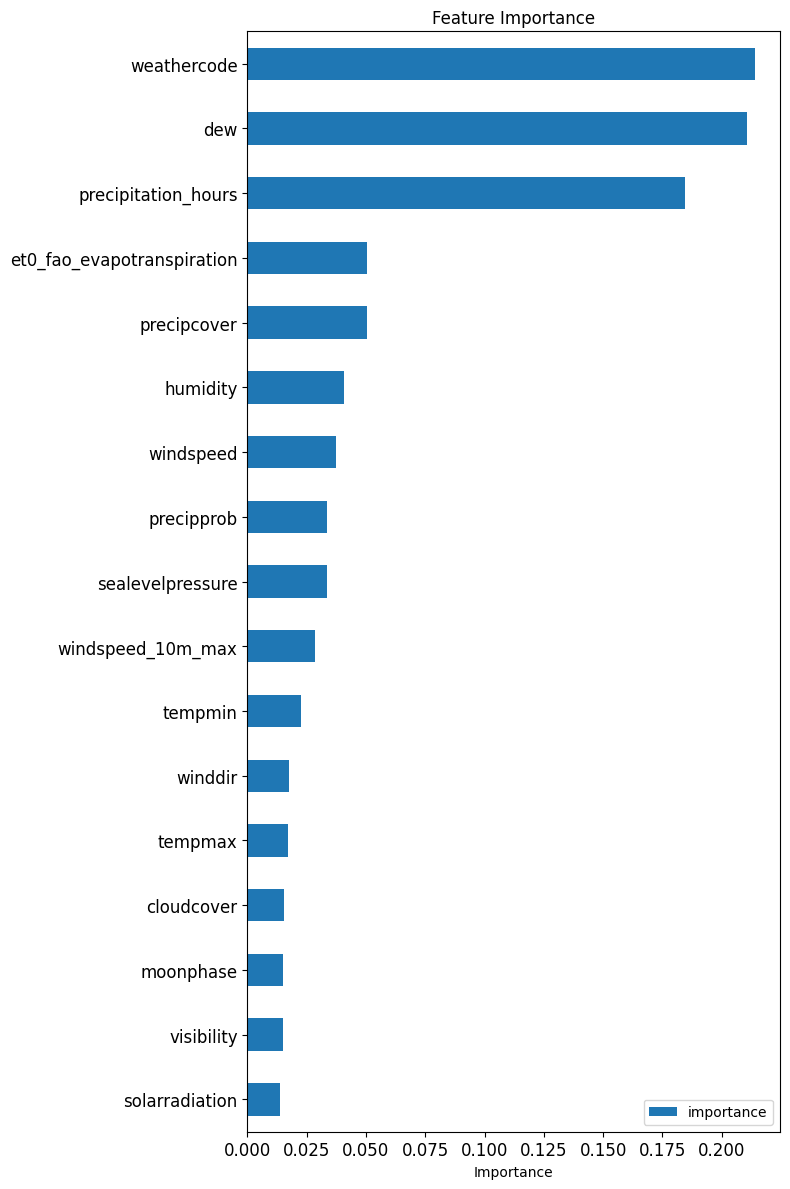

In [ ]:
fi = pd.DataFrame(final_model.feature_importances_,
                  index=X_train.columns, columns=['importance'])

fi = fi.sort_values('importance')

fig, ax = plt.subplots(figsize=(8, 12))

fi.plot.barh(title="Feature Importance", ax=ax)

ax.set_yticklabels(fi.index, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_ylabel('')
ax.set_xlabel('Importance')

fig.tight_layout()

plt.show()

In [ ]:

# Generate predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 0.04366307477343326
MAE: 0.021550207066947935
R^2: 0.6647867260473913


In [ ]:
# Print shapes of y_test and y_pred
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Convert the NumPy array to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['precip', 'rain_sum', 'river_discharge'])

# Now you can use head() on the DataFrame
print("y_pred_df head:\n", y_pred_df.head())


y_test shape: (594, 3)
y_pred shape: (594, 3)
y_pred_df head:
      precip  rain_sum  river_discharge
0  0.001661  0.018540         0.001388
1  0.001661  0.015964         0.001388
2  0.001661  0.016792         0.001388
3  0.001661  0.018540         0.001388
4  0.001661  0.016792         0.001388


plot for actual vs predicted values for test dataset

In [ ]:
def create_individual_plot(y_test, y_pred, variable_name):
    df_plot = pd.DataFrame({
        'Datetime': X_test.index,
        f'Actual_{variable_name}': y_test[variable_name],
        f'Predicted_{variable_name}': y_pred[:, y_test.columns.get_loc(variable_name)],
    })

    # Create an interactive plot using Plotly Express
    fig = px.line(df_plot, x='Datetime', y=[f'Actual_{variable_name}', f'Predicted_{variable_name}'],
                  labels={'value': 'Rainfall (mm)', 'Datetime': 'Datetime'},
                  title=f'Actual vs Predicted {variable_name} Rainfall')

    # Show the plot
    fig.show()

# Create individual plots for each variable
for variable_name in ['precip', 'rain_sum', 'river_discharge']:
    create_individual_plot(y_test, y_pred, variable_name)

Precip is predicted less than actual values

In [ ]:
# Initialize dictionaries to store metrics for each variable
mse_dict = {}
mae_dict = {}

# Function to calculate metrics for each variable
def calculate_metrics(y_true, y_pred, variable_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    mse_dict[variable_name] = mse
    mae_dict[variable_name] = mae

    print(f"{variable_name} MSE: {mse}")
    print(f"{variable_name} MAE: {mae}")
    print("")

# Calculate metrics for each variable
for i, variable_name in enumerate(['precip', 'rain_sum', 'river_discharge']):
    y_true = y_test[variable_name]
    y_pred_single_variable = y_pred[:, i]

    calculate_metrics(y_true, y_pred_single_variable, variable_name)

# Combine metrics if needed
combined_mse = sum(mse_dict.values()) / len(mse_dict)
combined_mae = sum(mae_dict.values()) / len(mae_dict)

print("Combined MSE: ", combined_mse)
print("Combined MAE: ", combined_mae)

precip MSE: 0.0052665110263213095
precip MAE: 0.039244450428919796

rain_sum MSE: 0.0037354461164337094
rain_sum MAE: 0.04584725650395718

river_discharge MSE: 0.005769262428227796
river_discharge MAE: 0.04891178569206577

Combined MSE:  0.0049237398569942714
Combined MAE:  0.04466783087498091


In [ ]:
import joblib
cwd = '/content/drive/MyDrive/data_Sylhet'
joblib.dump(final_model, cwd + '/final_xgboost_sylhet.joblib')

['/content/drive/MyDrive/data_Sylhet/final_xgboost_sylhet.joblib']

Tensorflow and LSTM (referenced from Vijay Mamillia)

In [ ]:
import tensorflow as tf

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/data_Sylhet/train.csv', index_col='datetime',parse_dates=True)
val_df = pd.read_csv('/content/drive/MyDrive/data_Sylhet/val.csv', index_col='datetime',parse_dates=True)
test_df = pd.read_csv('/content/drive/MyDrive/data_Sylhet/test.csv', index_col='datetime',parse_dates=True)

print(train_df.shape, val_df.shape, test_df.shape)

(2556, 20) (731, 20) (594, 20)


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels


    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

In [ ]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs

        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)

        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

Multi-output baseline model

In [ ]:
mo_single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['precip','rain_sum','river_discharge'])
mo_wide_window = DataWindow(input_width=14, label_width=14, shift=1, label_columns=['precip','rain_sum','river_discharge'])

In [ ]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}
print(column_indices['precip'])
print(column_indices['rain_sum'])
print(column_indices['river_discharge'])

4
15
19


In [ ]:
mo_baseline_last = Baseline(label_index=[4,15,19])

mo_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

mo_val_performance = {}
mo_performance = {}

mo_val_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.val)
mo_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.test, verbose=0)

23/23 [==============================] - 0s 3ms/step - loss: 0.0054 - mean_absolute_error: 0.0306


In [ ]:
print(mo_performance['Baseline - Last'][1])

0.026090946048498154


Implementing a deep neural network as a multi-output model

In [ ]:
def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')

    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])

    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])

    return history

In [ ]:
mo_dense = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=3)
])

history = compile_and_fit(mo_dense, mo_single_step_window)

mo_val_performance['Dense'] = mo_dense.evaluate(mo_single_step_window.val)
mo_performance['Dense'] = mo_dense.evaluate(mo_single_step_window.test, verbose=0)

Epoch 1/50
80/80 [==============================] - 2s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0473 - val_loss: 0.0043 - val_mean_absolute_error: 0.0367
Epoch 2/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0360 - val_loss: 0.0041 - val_mean_absolute_error: 0.0347
Epoch 3/50
80/80 [==============================] - 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0342 - val_loss: 0.0041 - val_mean_absolute_error: 0.0336
Epoch 4/50
80/80 [==============================] - 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0348 - val_loss: 0.0042 - val_mean_absolute_error: 0.0390
Epoch 5/50
80/80 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0325 - val_loss: 0.0039 - val_mean_absolute_error: 0.0323
Epoch 6/50
80/80 [==============================] - 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0325 - val_loss: 0.0040 - val_mean_absolute_error: 0.0342
Epoch 7/50
80/80 [==========

LSTM

In [ ]:
mo_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units = 3)
])

history = compile_and_fit(mo_lstm_model, mo_wide_window)

mo_val_performance = {}
mo_performance = {}

mo_val_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.val)
mo_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.test, verbose=0)

Epoch 1/50
80/80 [==============================] - 6s 33ms/step - loss: 0.0075 - mean_absolute_error: 0.0570 - val_loss: 0.0051 - val_mean_absolute_error: 0.0412
Epoch 2/50
80/80 [==============================] - 2s 21ms/step - loss: 0.0043 - mean_absolute_error: 0.0391 - val_loss: 0.0045 - val_mean_absolute_error: 0.0374
Epoch 3/50
80/80 [==============================] - 1s 18ms/step - loss: 0.0038 - mean_absolute_error: 0.0352 - val_loss: 0.0042 - val_mean_absolute_error: 0.0346
Epoch 4/50
80/80 [==============================] - 2s 20ms/step - loss: 0.0036 - mean_absolute_error: 0.0336 - val_loss: 0.0042 - val_mean_absolute_error: 0.0336
Epoch 5/50
80/80 [==============================] - 1s 13ms/step - loss: 0.0034 - mean_absolute_error: 0.0324 - val_loss: 0.0041 - val_mean_absolute_error: 0.0349
Epoch 6/50
80/80 [==============================] - 1s 13ms/step - loss: 0.0034 - mean_absolute_error: 0.0321 - val_loss: 0.0040 - val_mean_absolute_error: 0.0324
Epoch 7/50
80/80 [====

In [ ]:
# Assuming mo_wide_window.val is your validation data
mo_val_performance = mo_lstm_model.evaluate(mo_wide_window.val)
print("Validation Loss:", mo_val_performance[0])
print("Validation MAE:", mo_val_performance[1])


23/23 [==============================] - 0s 10ms/step - loss: 0.0038 - mean_absolute_error: 0.0313
Validation Loss: 0.003762332024052739
Validation MAE: 0.03125940263271332


In [ ]:
predicted_results = mo_lstm_model.predict(mo_wide_window.test)
predicted_array= predicted_results[0]

my_array = np.array(predicted_array)

df_raw = pd.DataFrame(my_array)

df = df_raw.rename(columns={0: "river_discharge", 1: "rain_sum",2:"precip"})


df.head(14)

19/19 [==============================] - 1s 4ms/step


,river_discharge,rain_sum,precip
0,-0.006841,0.015994,0.022414
1,-0.012186,0.035541,0.023903
2,-0.016045,0.057149,0.023339
3,-0.023892,0.062569,0.024526
4,-0.031928,0.068851,0.021891
5,-0.029536,0.072746,0.020149
6,-0.024369,0.076350,0.020156
7,-0.023272,0.077095,0.018816
8,-0.016054,0.082777,0.016325
9,-0.016485,0.084242,0.016108


In [ ]:
mo_lstm_model.save("/content/drive/MyDrive/data_Sylhet/lstm_sylhet_model.h5")

NameError: ignored

XGBoost gives MAE as 0.021 and LSTM gives 0.029, we can use XGBoost as it is more simple

In [ ]:
sylhet_model = keras.models.load_model("/content/drive/MyDrive/data_Sylhet/lstm_sylhet_model.h5")

In [ ]:
class DataWindow:
    def __init__(self, input_width, label_width, shift, test_df, label_columns=None):
        self.test_df = test_df
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(test_df.columns)}
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def test(self):
        return self.make_dataset(self.test_df)


In [ ]:
def predict(days: int):
    custom_mo_wide_window = DataWindow(input_width=days, label_width=days, shift=days, test_df=test_df,
                                       label_columns=['precip','rain_sum','river_discharge'])

    predicted_results = sylhet_model.predict(custom_mo_wide_window.test)
    predicted_array= predicted_results[0]

    predicted_numpy_array = np.array(predicted_array)

    df_scaled = pd.DataFrame(predicted_numpy_array)

    df = df_scaled.rename(columns={0: "river_discharge", 1: "rain_sum",2:"precip"})

    '''RD_max_train = 1.0
    RD_min_train = 0.0008077544426494
    RD_max_test =  0.7019386106623586
    RD_min_test =  0.0

    R_max_train = 1.0
    R_min_train = 0.0
    R_max_test = 0.4720101781170483
    R_min_test = 0.0

    P_max_train = 0.78
    P_min_train = 0.0
    P_max_test = 0.765
    P_min_test = 0.0'''

    RD_max_train = 25.61
    RD_min_train = 0.85

    R_max_train = 235.80
    R_min_train = 0.0

    P_max_train = 200.00
    P_min_train = 0.0



    df['river_discharge'] = df['river_discharge'].apply(lambda x: x*(RD_max_train - RD_min_train) + RD_min_train)
    df['rain_sum'] = df['rain_sum'].apply(lambda x: x*(R_max_train - R_min_train) + R_min_train)
    df['precip'] = df['precip'].apply(lambda x: x*(P_max_train - P_min_train) + P_min_train)
    df['floods'] = df['precip'] >2;

    return df

In [ ]:
predict(14)


18/18 [==============================] - 2s 7ms/step


,river_discharge,rain_sum,precip,floods
0,1.059916,4.036276,4.116799,True
1,1.259384,8.561320,2.152447,True
2,1.303738,11.505052,-0.448392,False
3,1.340179,14.007874,-2.486373,False
4,1.170138,14.987387,-3.344618,False
5,0.914379,15.150222,-3.427906,False
6,1.263031,17.730162,-2.971257,False
7,1.327773,18.833276,-3.985048,False
8,1.188023,18.497560,-3.887690,False
9,1.219139,19.030826,-3.902643,False
